##Assignment No. 03

# Modern Deep Learning:
# Classify Fashion-MNIST with a simple CNN in Keras

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


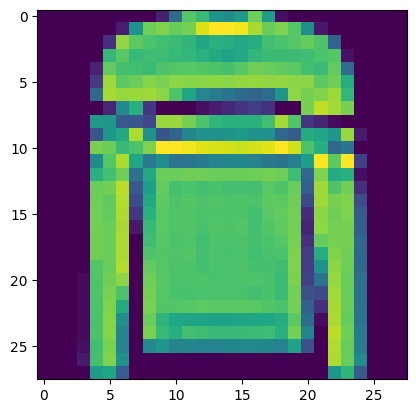

In [2]:

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')


fashion_mnist_labels = ["T-shirt/top",
                        "Trouser",
                        "Pullover",
                        "Dress",
                        "Coat",
                        "Sandal",
                        "Shirt",
                        "Sneaker",
                        "Bag",
                        "Ankle boot"]


img_index = 5

label_index = y_train[img_index]

print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

plt.imshow(x_train[img_index])

In [3]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = tf.keras.Sequential()

model.add(Conv2D(filters=64,
                 kernel_size=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28,28,1)
                 ))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [7]:
BATCH_SIZE=1000
EPOCHS = 20

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.2,verbose=1)

Epoch 1/20
48/48 [==============================] - 8s 51ms/step - loss: 10.6235 - accuracy: 0.3909 - val_loss: 1.1313 - val_accuracy: 0.5906
Epoch 2/20
48/48 [==============================] - 2s 36ms/step - loss: 1.2536 - accuracy: 0.5439 - val_loss: 0.8510 - val_accuracy: 0.6837
Epoch 3/20
48/48 [==============================] - 2s 38ms/step - loss: 1.0283 - accuracy: 0.6212 - val_loss: 0.7540 - val_accuracy: 0.7327
Epoch 4/20
48/48 [==============================] - 2s 50ms/step - loss: 0.9175 - accuracy: 0.6592 - val_loss: 0.6702 - val_accuracy: 0.7550
Epoch 5/20
48/48 [==============================] - 2s 41ms/step - loss: 0.8412 - accuracy: 0.6888 - val_loss: 0.6099 - val_accuracy: 0.7727
Epoch 6/20
48/48 [==============================] - 2s 32ms/step - loss: 0.7701 - accuracy: 0.7126 - val_loss: 0.5719 - val_accuracy: 0.7890
Epoch 7/20
48/48 [==============================] - 1s 31ms/step - loss: 0.7232 - accuracy: 0.7285 - val_loss: 0.5386 - val_accuracy: 0.8043
Epoch 8/20
4

In [8]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

60/60 [==============================] - 0s 7ms/step - loss: 0.3630 - accuracy: 0.8635


0.8634833097457886

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

10/10 [==============================] - 0s 8ms/step - loss: 0.4000 - accuracy: 0.8529


0.8529000282287598

313/313 [==============================] - 1s 2ms/step


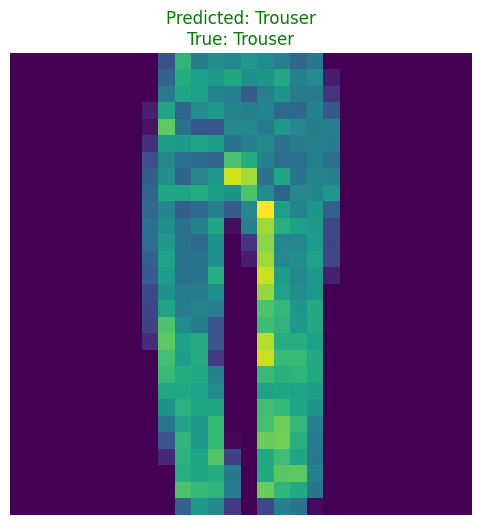

In [13]:
y_hat = model.predict(x_test)

# Plot a single test image, its predicted label and ground truth
index = np.random.randint(0, x_test.shape[0])  # Choose a random index for the test image

plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(x_test[index]))
plt.title("Predicted: {}\nTrue: {}".format(fashion_mnist_labels[np.argmax(y_hat[index])],
                                           fashion_mnist_labels[y_test[index]]),
          color=("green" if np.argmax(y_hat[index]) == y_test[index] else "red"))
plt.axis('off')
plt.show()


# # Plot a random sample of 10 test images, their predicted labels and ground truth
# figure = plt.figure(figsize=(20, 8))
# for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
#     ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
#     # Display each image
#     ax.imshow(np.squeeze(x_test[index]))
#     predict_index = np.argmax(y_hat[index])
#     true_index = y_test[index]
#     # Set the title for each image
#     ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
#                                   fashion_mnist_labels[true_index]),
#                                   color=("green" if predict_index == true_index else "red"))
